This data is a book collection data, including bookowners' name, booktitles and some other information.
Only one CSV file.

Firstly read the file and use 'head' to see the structure.

In [1]:
import pandas as pd
import numpy as np
import sys
from operator import itemgetter 
from itertools import groupby 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


data=pd.read_csv('ModernistLibraries20171025utf8.csv')

data.head()


,BookOwnerVIAFID,BookOwnerName,WorkID,BookID,BookTitle,BookAuthorName,BookPubDetails,BookPubDate,BookNotes,BookCollection,InformationSource,Unnamed: 11
0,97006051,Ernest Hemingway,4650949,25197870,Sinistro and celebration: 19 poems,A.E.T.,1956,1956,NaN,Finca Vigia.,manual entry,NaN
1,97006051,Ernest Hemingway,4650967,25198046,Tauromaquia y taurogoga: Algunos concertos bsi...,R. Abarquero Durango,"Madrid: Torroba, 1959.",1959,NaN,Finca Vigia.,manual entry,NaN
2,97006051,Ernest Hemingway,429839,25198087,We pointed them North; recollections of a cowp...,Edward Charles Abbott,"Norman: University of Oklahoma Press [1955, c1...",1955,NaN,Finca Vigia.,Library of Congress,NaN
3,97006051,Ernest Hemingway,429839,25198220,We pointed them north; recollections of a cowp...,Edward Charles Abbott,"New York: Farrar & Rinehart, inc. [c1939]",1939,NaN,Finca Vigia.,Library of Congress,NaN
4,97006051,Ernest Hemingway,7785885,25198292,Japan unmasked,Hallett Edward Abend,"New York: I. Washburn, Inc., 1941.",1941,NaN,Finca Vigia.,Library of Congress,NaN


In [2]:
data.describe()

,BookOwnerVIAFID,WorkID,BookID,Unnamed: 11
count,2.332100e+04,2.332100e+04,2.332100e+04,1.0
mean,5.677423e+07,5.233644e+06,6.061313e+07,1870.0
std,3.273400e+07,4.930865e+06,3.498383e+07,NaN
min,2.465832e+06,1.050000e+02,2.519787e+07,1870.0
25%,3.938548e+07,7.617820e+05,2.703023e+07,1870.0
50%,4.430064e+07,4.694278e+06,4.765704e+07,1870.0
75%,9.700605e+07,8.343884e+06,9.356831e+07,1870.0
max,1.002542e+08,1.953249e+07,1.268260e+08,1870.0


The type of the data is tabular.

In [3]:
#Statistic the rows
data_shape = np.array(data)
print ('The total number of rows is',data_shape.shape[0],'.')

The total number of rows is 23321 .


In [4]:
#Statistic the columns
print('The total number of columns is',data_shape.shape[1],'.')

The total number of columns is 12 .


In [104]:
print('The size of the data is',sys.getsizeof(data),'kb.')

The size of the data is 15464438 kb.


Use groupby to do statistic about the number of bookowners and how many books they had.

In [6]:
data.groupby('BookOwnerName').count().BookID

BookOwnerName
Edith Sitwell               857
Edna St. Vincent Millay    1183
Ernest Hemingway           7408
Ezra Pound                  711
F. Scott Fitzgerald         311
Flannery O'Connor           281
Gertrude Stein              958
James Joyce                1197
Langston Hughes             141
Virginia Woolf             5075
W.B. Yeats                 2267
W.H. Auden                  329
e.e. cummings              2603
Name: BookID, dtype: int64

Use another way to illustrate it.

In [7]:
bookowner=np.array(data['BookOwnerName'])

print('Edith Sitwell had',np.sum(bookowner=='Edith Sitwell'),'books.')
print('Edna St. Vincent Millay had',np.sum(bookowner=='Edna St. Vincent Millay'),'books.')
print('Ernest Hemingway had',np.sum(bookowner=='Ernest Hemingway'),'books.')
print('Ezra Pound had',np.sum(bookowner=='Ezra Pound'),'books.')
print('F. Scott Fitzgerald',np.sum(bookowner=='F. Scott Fitzgerald'),'books.')
print('Flannery O‘Connor had',np.sum(bookowner=='Edna St. Vincent Millay'),'books.')
print('Gertrude Stein had',np.sum(bookowner=='Gertrude Stein'),'books.')
print('James Joyce had',np.sum(bookowner=='James Joyce'),'books.')
print('Langston Hughes had',np.sum(bookowner=='Langston Hughes'),'books.')
print('Virginia Woolf had',np.sum(bookowner=='Virginia Woolf'),'books.')
print('W.B. Yeats had',np.sum(bookowner=='W.B. Yeats'),'books.')
print('W.H. Auden had',np.sum(bookowner=='W.H. Auden'),'books.')
print('e.e. cummings had',np.sum(bookowner=='e.e. cummings'),'books.')

Edith Sitwell had 857 books.
Edna St. Vincent Millay had 1183 books.
Ernest Hemingway had 7408 books.
Ezra Pound had 711 books.
F. Scott Fitzgerald 311 books.
Flannery O‘Connor had 1183 books.
Gertrude Stein had 958 books.
James Joyce had 1197 books.
Langston Hughes had 141 books.
Virginia Woolf had 5075 books.
W.B. Yeats had 2267 books.
W.H. Auden had 329 books.
e.e. cummings had 2603 books.


In [8]:
#To find the person who collected the most books among all owners.

from collections import Counter
print('These are the name of the bookowner who had the most books and the quantity of those books:')
Counter(bookowner).most_common(1)

These are the name of the bookowner who had the most books and the quantity of those books:


[('Ernest Hemingway', 7408)]

In [9]:
#I found that there are many useless value in the 'BookPubDate' so I decided to clean the data.

data2=data
data2[' BookPubDate']=data2[' BookPubDate'].astype('str')
a=[]
for i,time in enumerate(data2[' BookPubDate']):
    a.append(False)
    if str(time).isdigit():
        if len(time)==4:
            
            a[i]=True
        else:
            pass
    else:
        pass
clean_data=data2[a]
clean_data=clean_data.reset_index(drop=True)
clean_data.head()

,BookOwnerVIAFID,BookOwnerName,WorkID,BookID,BookTitle,BookAuthorName,BookPubDetails,BookPubDate,BookNotes,BookCollection,InformationSource,Unnamed: 11
0,97006051,Ernest Hemingway,4650949,25197870,Sinistro and celebration: 19 poems,A.E.T.,1956,1956,NaN,Finca Vigia.,manual entry,NaN
1,97006051,Ernest Hemingway,4650967,25198046,Tauromaquia y taurogoga: Algunos concertos bsi...,R. Abarquero Durango,"Madrid: Torroba, 1959.",1959,NaN,Finca Vigia.,manual entry,NaN
2,97006051,Ernest Hemingway,429839,25198087,We pointed them North; recollections of a cowp...,Edward Charles Abbott,"Norman: University of Oklahoma Press [1955, c1...",1955,NaN,Finca Vigia.,Library of Congress,NaN
3,97006051,Ernest Hemingway,429839,25198220,We pointed them north; recollections of a cowp...,Edward Charles Abbott,"New York: Farrar & Rinehart, inc. [c1939]",1939,NaN,Finca Vigia.,Library of Congress,NaN
4,97006051,Ernest Hemingway,7785885,25198292,Japan unmasked,Hallett Edward Abend,"New York: I. Washburn, Inc., 1941.",1941,NaN,Finca Vigia.,Library of Congress,NaN


In [10]:
#To find the newest book.

clean_data[' BookPubDate']=clean_data[' BookPubDate'].astype('float')
clean_data.drop(clean_data.index[clean_data[' BookPubDate'] >2017 ],inplace=True)

clean_data[clean_data[' BookPubDate'].isin([max(clean_data[' BookPubDate'])])]


,BookOwnerVIAFID,BookOwnerName,WorkID,BookID,BookTitle,BookAuthorName,BookPubDetails,BookPubDate,BookNotes,BookCollection,InformationSource,Unnamed: 11
9547,46768718,W.B. Yeats,88312,35837869,Matter and Memory,Henri Bergson,NaN,2007.0,NaN,NaN,NaN,NaN


In [11]:
#To find the oldest book.

clean_data[clean_data[' BookPubDate'].isin([min(clean_data[' BookPubDate'])])]

,BookOwnerVIAFID,BookOwnerName,WorkID,BookID,BookTitle,BookAuthorName,BookPubDetails,BookPubDate,BookNotes,BookCollection,InformationSource,Unnamed: 11
11275,12306931,e.e. cummings,9299083,54020658,A little treasury of 20th century American poe...,Oscar Williams,[n.p.] Colpix Records PS 1000-1001. [1963],1000.0,America's leading poets read their own poems! ...,NaN,NaN,NaN


In [100]:
#To find some patterns about the books' publish time.

clean_data[' BookPubDate']=clean_data[' BookPubDate'].astype('float')

print('The middle year of all books is', int(np.median(clean_data[' BookPubDate'])),'.')
#Range
print('The range of years of all books is',round((np.ptp(clean_data[' BookPubDate'])),2),'.')
#variance
print('The variance of years of all books is',round((np.var(clean_data[' BookPubDate'])),2),'.')
#Standard Deviation
print('The standard deviation of years of all books is',round((np.std(clean_data[' BookPubDate'])),2),'.')
 #Coefficient of Variation
print('The Coefficient of Variation is',round((np.mean(clean_data[' BookPubDate'])/np.std(clean_data[' BookPubDate'])),2),'.')

The middle year of all books is 1934 .
The range of years of all books is 1007.0 .
The variance of years of all books is 1205.04 .
The standard deviation of years of all books is 34.71 .
The Coefficient of Variation is 55.54 .




For further exploration, I created 13 new dataframe by book owners.

In [13]:
Hemingway=clean_data.loc[(clean_data['BookOwnerName']=='Ernest Hemingway')]

Sitwell=clean_data.loc[(clean_data['BookOwnerName']=='Edith Sitwell')]

Millay=clean_data.loc[(clean_data['BookOwnerName']=='Edna St. Vincent Millay')]

Pound=clean_data.loc[(clean_data['BookOwnerName']=='Ezra Pound')]

Fitzgerald=clean_data.loc[(clean_data['BookOwnerName']=='F. Scott Fitzgerald')]

Connor=clean_data.loc[(clean_data['BookOwnerName']=='Edith Sitwell')]

Stein=clean_data.loc[(clean_data['BookOwnerName']=='Gertrude Stein')]

Joyce=clean_data.loc[(clean_data['BookOwnerName']=='James Joyce')]

Hughes=clean_data.loc[(clean_data['BookOwnerName']=='Langston Hughes')]

Woolf=clean_data.loc[(clean_data['BookOwnerName']=='Virginia Woolf')]

Yeats=clean_data.loc[(clean_data['BookOwnerName']=='W.B. Yeats')]

Auden=clean_data.loc[(clean_data['BookOwnerName']=='W.H. Auden')]

cummings=clean_data.loc[(clean_data['BookOwnerName']=='e.e. cummings')]


Using a countplot to illustrate the comparison among book quantities of owners.

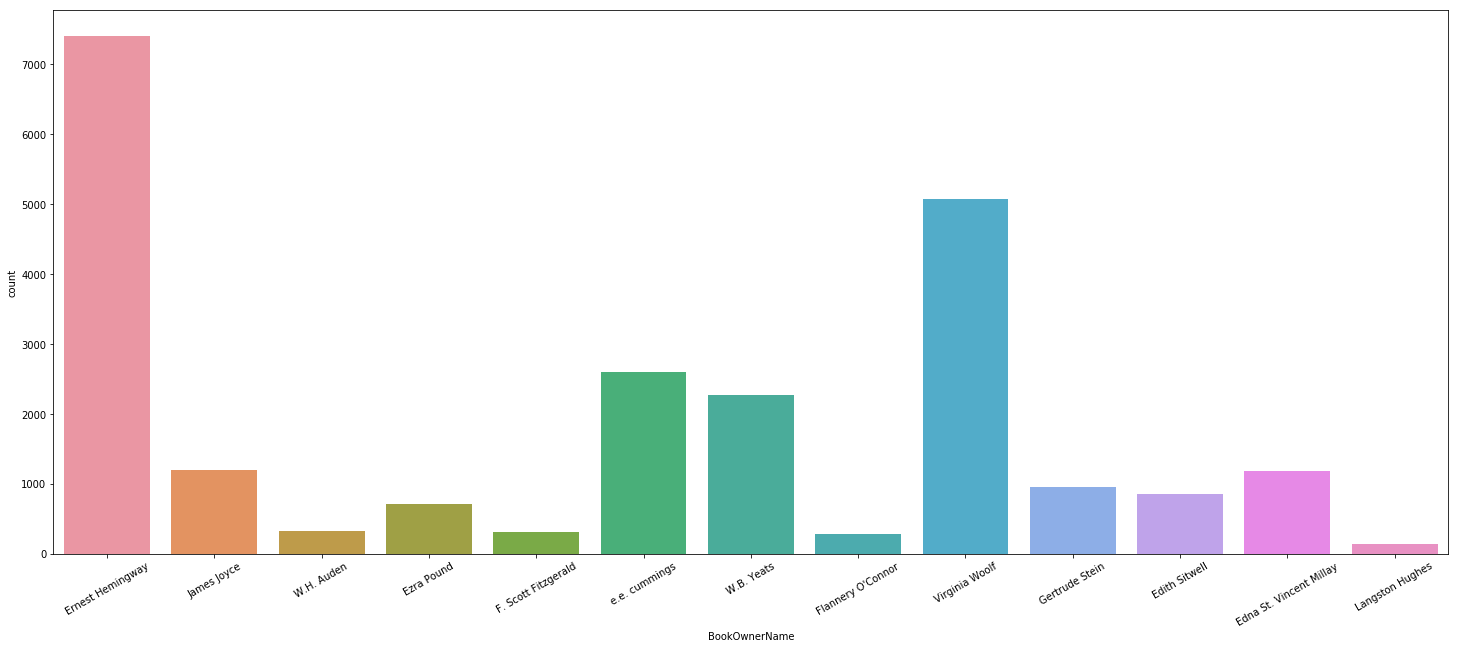

In [14]:
plt.figure(figsize=(25,10))
sns.countplot(x='BookOwnerName',data=data)
plt.xticks(rotation=30)
plt.show()

Exploring the relationship between books and years.

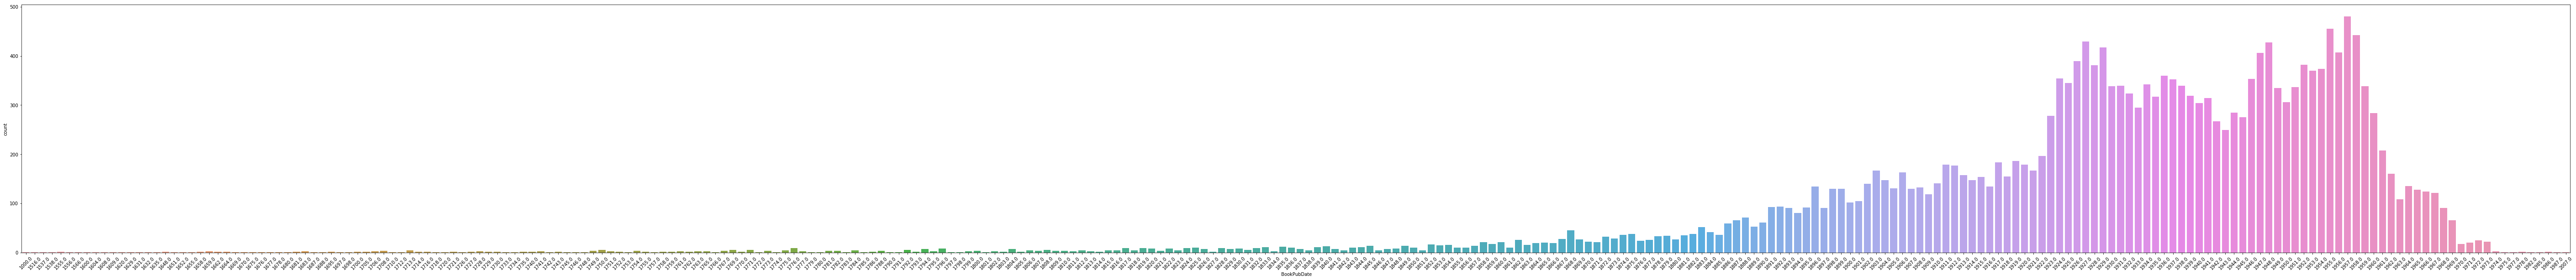

In [15]:
plt.figure(figsize=(100,10))
chart=sns.countplot(x=' BookPubDate',data=clean_data)

plt.xticks(rotation=45)
plt.show()

I put all 13 plots together to compare the year distribution of books of all owners.

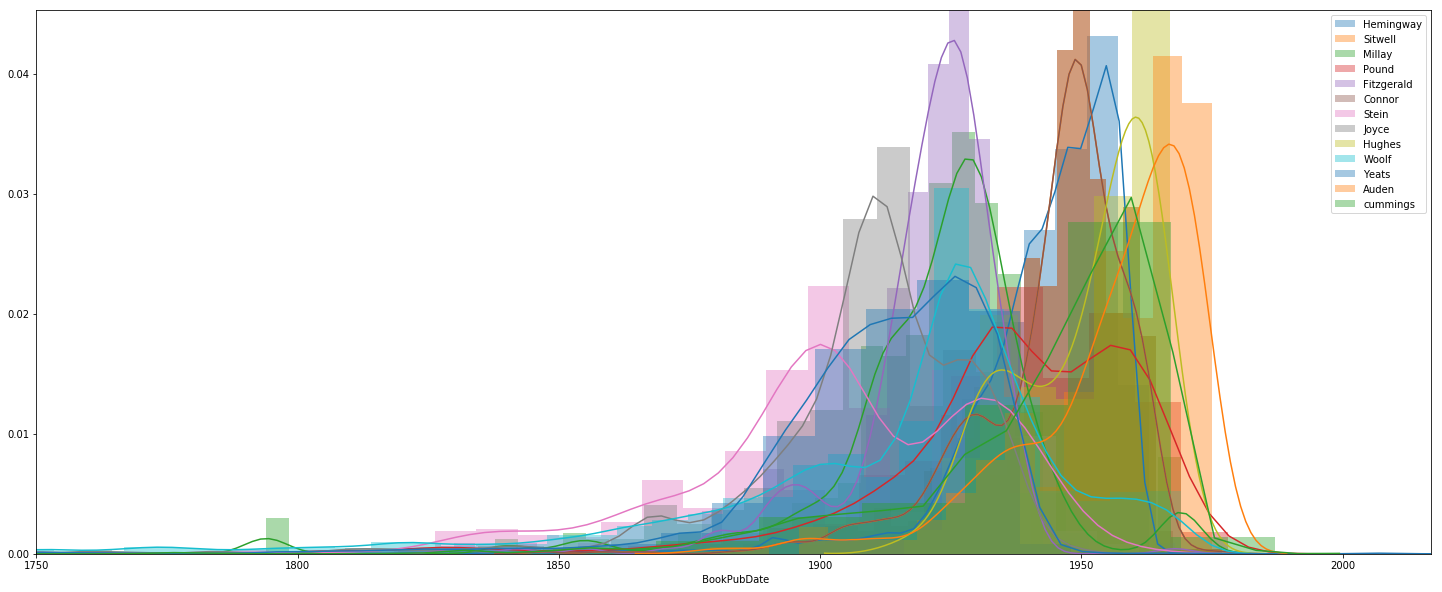

In [108]:
plt.figure(figsize=(25,10))
chart = sns.distplot(Hemingway[' BookPubDate'],label="Hemingway")
chart = sns.distplot(Sitwell[' BookPubDate'],label="Sitwell")
chart = sns.distplot(Millay[' BookPubDate'],label="Millay")
chart = sns.distplot(Pound[' BookPubDate'],label="Pound")
chart = sns.distplot(Fitzgerald[' BookPubDate'],label="Fitzgerald")
chart = sns.distplot(Connor[' BookPubDate'],label="Connor")
chart = sns.distplot(Stein[' BookPubDate'],label="Stein")
chart = sns.distplot(Joyce[' BookPubDate'],label="Joyce")
chart = sns.distplot(Hughes[' BookPubDate'],label="Hughes")
chart = sns.distplot(Woolf[' BookPubDate'],label="Woolf")
chart = sns.distplot(Yeats[' BookPubDate'],label="Yeats")
chart = sns.distplot(Auden[' BookPubDate'],label="Auden")
chart = sns.distplot(cummings[' BookPubDate'],label="cummings")

plt.xlim(1750, 2017)
plt.legend()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

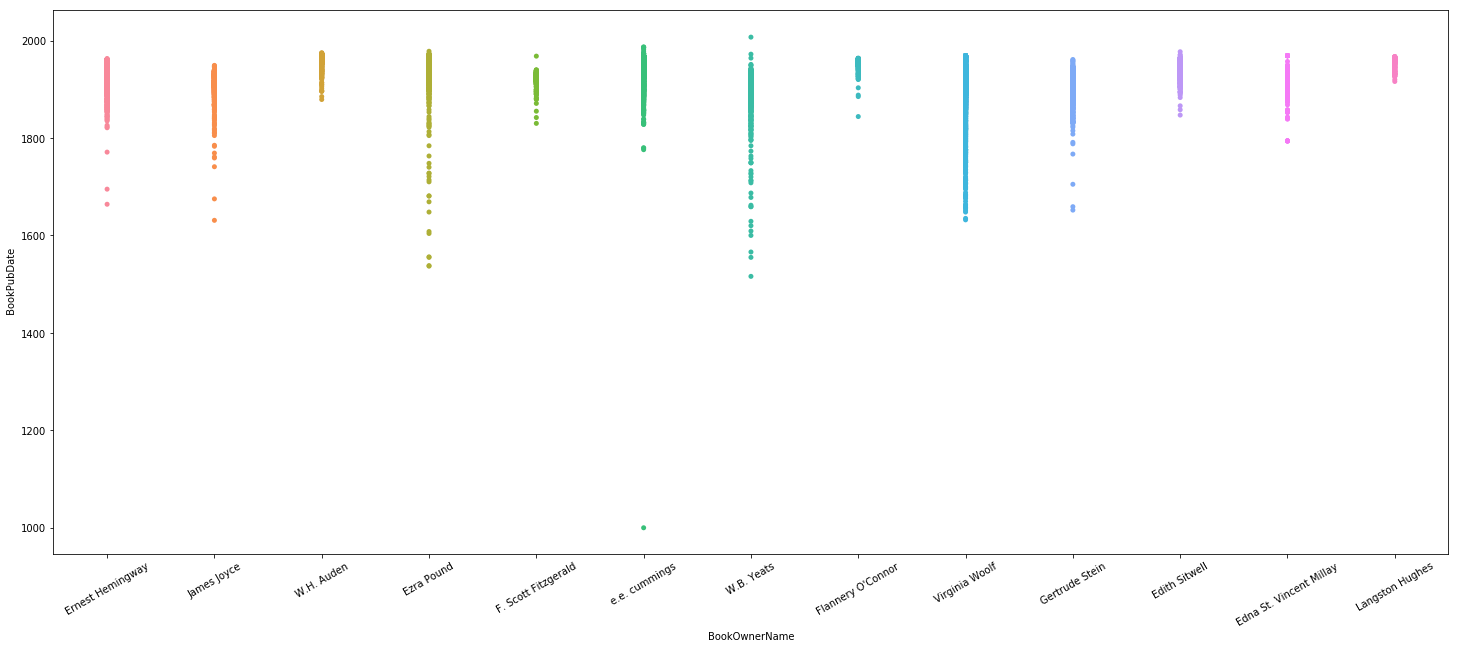

In [18]:
#Using another way to show it and in this graph can clearly see the patterns raletively.

plt.figure(figsize=(25,10))
sns.stripplot(x="BookOwnerName", y=" BookPubDate", data=clean_data)
plt.xticks(rotation=30)

I wanted to see the relationship between books and years.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

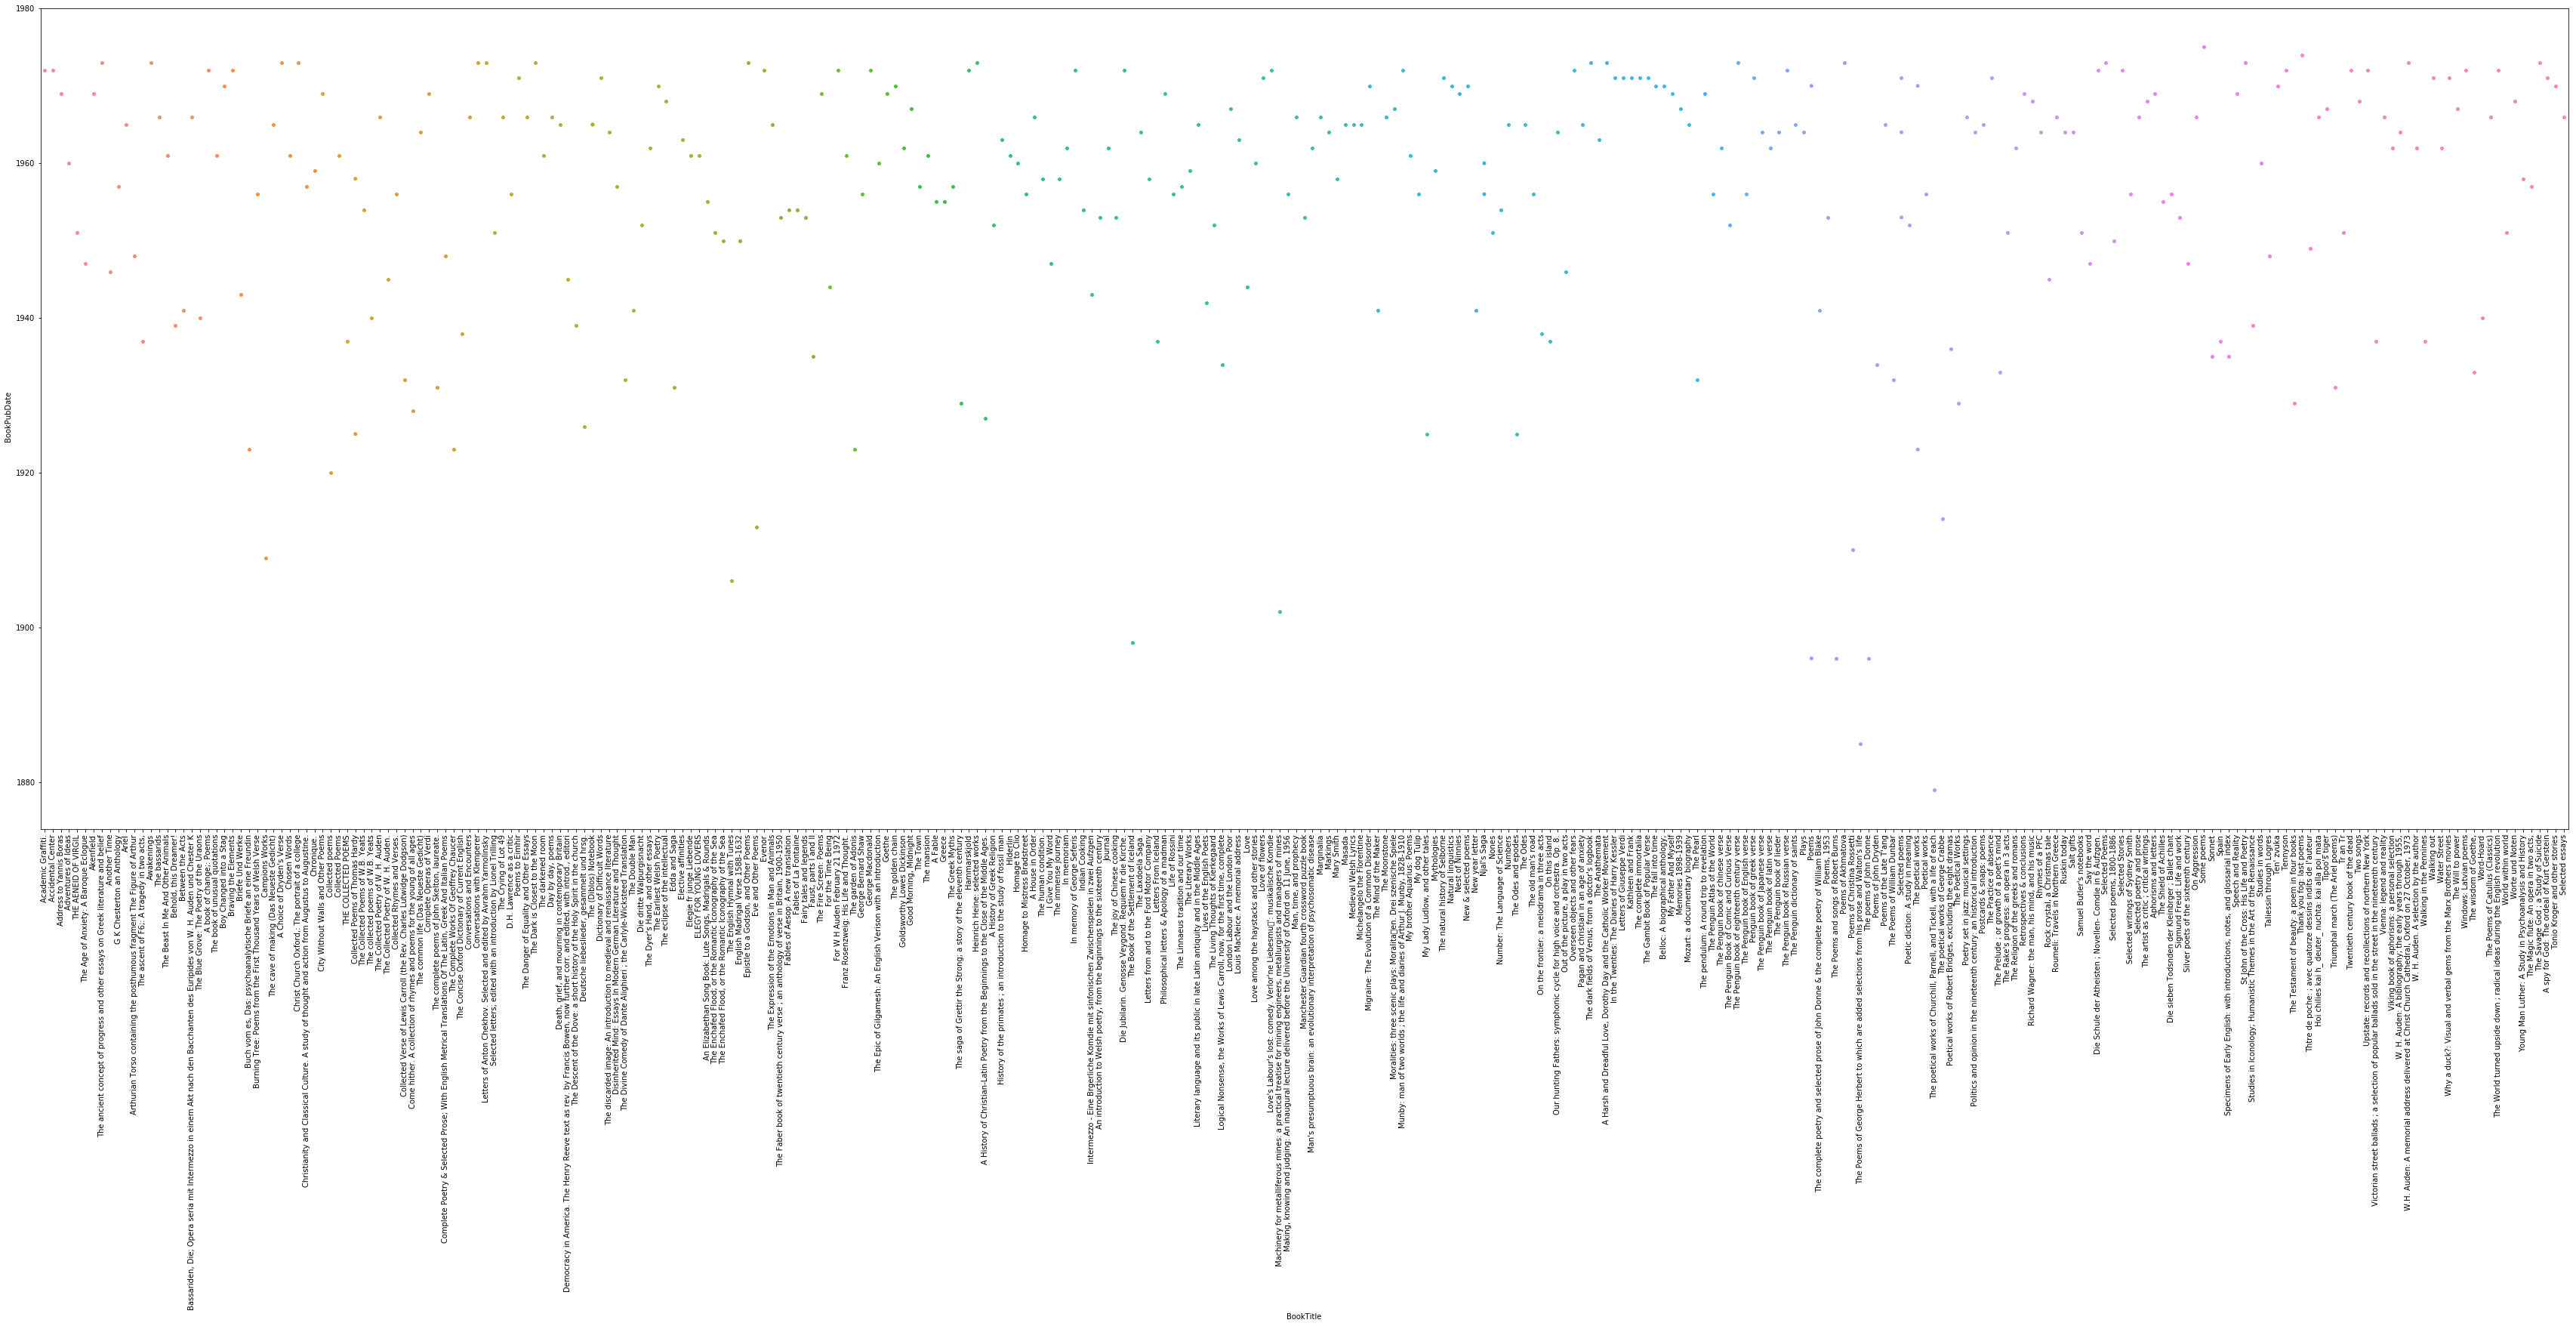

In [102]:
#Because the data is too big so I just chose the owner who collect less books to explore the booktitles and years.

plt.figure(figsize=(60,20))
sns.stripplot(x="BookTitle", y=" BookPubDate", data=Auden)#Auden is the new dataframe I created for the owner W.H. Auden and he only had 329 books.
plt.xticks(rotation=90)

I want to know something about bookid and workid (maybe to find differences?).

/Users/yehuahua0330/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  # This is added back by InteractiveShellApp.init_path()


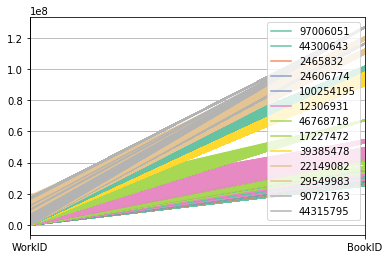

In [32]:

import pandas
import matplotlib.pyplot as plt
from pandas.tools.plotting import parallel_coordinates

import seaborn as sns
A=clean_data.loc[0:,('WorkID','BookID','BookOwnerVIAFID')]

parallel_coordinates(A,'BookOwnerVIAFID', colormap=plt.get_cmap("Set2"))
plt.show()


From the graph above I can find that the quantity of workid is less than that of bookid and may has some relationships.





I want to see what will happen after do statistics about the repetition of book collection for all owners.

In [68]:
#I tended to choose most 3 repetition of book authors.
#Statistics whose book were collected many times in 13 new dataframe(devided by bookowners)

print('Hemingway',Counter(Hemingway['BookAuthorName']).most_common(4))#Sometimes there are many empty value so I choose the first 4.
print('Sitwell',Counter(Sitwell['BookAuthorName']).most_common(4))
print('Millay',Counter(Millay['BookAuthorName']).most_common(4))
print('Pound',Counter(Pound['BookAuthorName']).most_common(4))
print('Fitzgerald',Counter(Fitzgerald['BookAuthorName']).most_common(4))

print('Connor',Counter(Connor['BookAuthorName']).most_common(4))
print('Stein',Counter(Stein['BookAuthorName']).most_common(4))
print('Joyce',Counter(Joyce['BookAuthorName']).most_common(4))
print('Hughes',Counter(Hughes['BookAuthorName']).most_common(4))
print('Woolf',Counter(Woolf['BookAuthorName']).most_common(4))

print('Yeats',Counter(Yeats['BookAuthorName']).most_common(4))
print('Auden',Counter(Auden['BookAuthorName']).most_common(4))
print('cummings',Counter(cummings['BookAuthorName']).most_common(4))


Hemingway [('[N.auth]', 178), ('Georges Simenon', 42), ('Honor de Balzac', 30), ('Ezra Pound', 24)]
Sitwell [('Edith Sitwell ', 104), ('Jack Lindsay ', 13), ('Algernon Charles Swinburne ', 12), ('Graham Greene ', 11)]
Millay [('[N.auth]', 95), ('Henrik Ibsen', 10), ('Pierre de Ronsard', 7), ('Arthur Davison Ficke', 7)]
Pound [('Ezra Pound   ', 65), ('[N.auth]   ', 19), ('Upton Sinclair   ', 7), ('Alexander Del Mar   ', 7)]
Fitzgerald [('[N.auth]', 10), ('F. Scott Fitzgerald', 8), ('Theodore Dreiser', 5), ('Robert Hugh Benson', 4)]
Connor [('Edith Sitwell ', 104), ('Jack Lindsay ', 13), ('Algernon Charles Swinburne ', 12), ('Graham Greene ', 11)]
Stein [('Anthony Trollope', 45), ('Honor de Balzac', 40), ('Alexandre Dumas', 21), ('William Shakespeare', 17)]
Joyce [('James Joyce', 42), ('William Shakespeare', 21), (nan, 19), ('George Moore', 18)]
Hughes [('Hughes, Langston', 50), ('[N.auth]', 25), ('Baldwin, James', 4), ('Pardo Garcia, German', 3)]
Woolf [(' Leonard Woolf ', 38), (' Willi

Use a graph to show it.

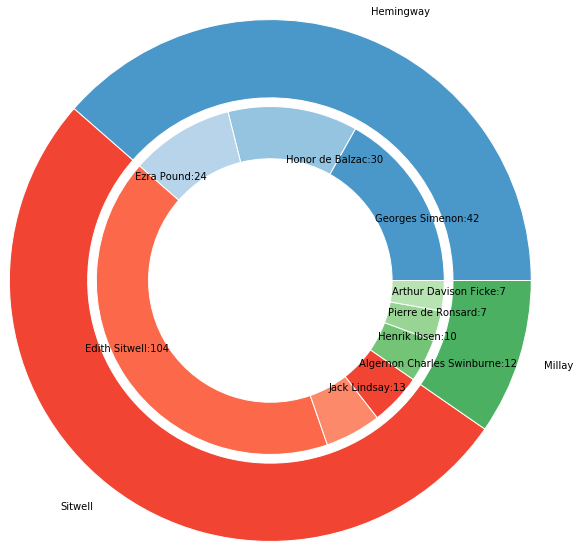

In [85]:
#I only chooes 3 owners to send as an example because the computer can not work well.

import matplotlib.pyplot as plt
 
# Make data: I have 3 groups and 9 subgroups
group_names=['Hemingway', 'Sitwell', 'Millay']
group_size=[96,129,24]
subgroup_names=['Georges Simenon:42', 'Honor de Balzac:30', 'Ezra Pound:24', 'Edith Sitwell:104', 'Jack Lindsay:13','Algernon Charles Swinburne:12', 'Henrik Ibsen:10', 'Pierre de Ronsard:7', 'Arthur Davison Ficke:7']
subgroup_size=[42,30,24,104,13,12,10,7,7]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.9, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=2.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.6), a(0.4), a(0.3), b(0.5), b(0.4), b(0.6), c(0.5), c(0.4), c(0.3)])
plt.setp( mypie2, width=0.6, edgecolor='white')
plt.margins(0,0)

# show it
plt.show()


Reflection

What   do   you   think   might   be   behind   the   relationships and distributions   that   you   have   found?   How   does   your   data   relate   to   the   world?   In   short, what   hypotheses   came   up   as   you   explored   the   data,   and   how   would   you   go   about testing   them?   


---
After processing some parts of the data, I have found something interesting behind the relationships between variations. For example, the WorkID for each row is repeated throughout the stylesheet but BookID is not, which means that, one booktitle could have many copies in different places and each copy will have a unique BookID while all these copies and BookIDs have the same WorkID. From this example, I could know that sometimes people are likely to use numbers to express an affiliation. 

My data contains years and locations (cities around the world) about book publish details and I think this kind of data is the key information to help us find something related to the real world. In my data, most of the cities are capitals or famous cities such as London, New York and Paris, which means that those bookowners were more likely to trust in well-known presses. At this time we could analyse the reason of it – maybe the reason is that those bookowners were more likely to live in famous cities, or it is because at that time there were no many choices of the source of books. Nationalities of bookauthors could also be considered as a related reason.

In all, because of the lack of direct number data, we had to do statistics first and then tried to explore the probable relationships among results. During this process, sometimes we were supposed to add some other information to get conclusions. 



---

hypotheses   with   an   explanation   of:

■ What   your   hypothesis   is

■ why   you   think   that   (referring   to   your   graphs)

■ How   you   could   go   about   testing   it   (note   that   this   may   include:   further studies,   asking   the   data   owner,   using   some   advanced   algorithms, checking   each   data   point   individually,   etc..)

---

My first hypothesis is that bookowners may have some relationships to the bookauthors who showed mostly because I did statistics about the repetition of authors in each bookowners’ dataframe. Some owner collected a particularly large number of books of the same author. We need to find more information about their own experience.

My second hypothesis is that the quantity of books belongs to each owner is related to those owners’ working experience, which means that the longer time they spend on their writing career, the more books they were likely to have, or it to some extent related to their reputation. We need to do look for some details of their well-known conditions.

My final hypothesis is that the location information of those books belongs to bookowners has a bond to the bookowners actual experience during one period. All books have publishing details information including locations and time while all owners have location and time information too, so I want to match them. But this part I need to use other complex statistics such as regular expression.
